# vector_plot

In this example, we will plot the vector field from three point charges. Since the vector field is 3D, we will plot a 2D cross-section, and rotate it.

An electric charge distribution of the form:

$\rho = q_0(\delta^3(r'-a\hat{z})-\delta^3(r'-a\hat{x})-\delta^3(r'+a\hat{x}))$

Gives and electric field:

$\vec{E}(\vec{r}) = \frac{q_0}{4\pi\epsilon_0 a^2}(\frac{\frac{\vec{r}}{a}-\hat{z}}{|\frac{\vec{r}}{a}-\hat{z}|^3}-\frac{\frac{\vec{r}}{a}-\hat{x}}{|\frac{\vec{r}}{a}-\hat{x}|^3}-\frac{\frac{\vec{r}}{a}+\hat{x}}{|\frac{\vec{r}}{a}+\hat{x}|^3})$

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import animatplot as amp

Here we compute the $s$ and $z$ components of the electric field at angles ranging from $0$ to $2\pi$.

In [2]:
def norm(x, y, z):
    return (x**2+y**2+z**2)**.5
def electric_field(s, z, theta=0):
    """The E_s and E_z components of the field at any point in space
    
    Computes the x, y, and z components then projects it onto the sz-plane.
    """
    x = s*np.cos(theta)
    y = s*np.sin(theta)

    Ex = x/norm(x, y, z-1)**3-(x-1)/norm(x-1, y, z)**3-(x+1)/norm(x+1, y, z)**3
    Ey = y/norm(x, y, z-1)**3-y/norm(x-1, y, z)**3-y/norm(x+1, y, z)**3
    Ez = (z-1)/norm(x, y, z-1)**3-z/norm(x-1, y, z)**3-z/norm(x+1, y, z)**3

    Es = Ex*np.cos(theta)+Ey*np.sin(theta)
    return Es, Ez
def space(n):
    d = .333
    b = 2
    s = np.linspace(-b, b, n)
    z = np.linspace(-b+d, b+d, n)
    angles = np.linspace(0, 2*np.pi, 50)
    s, z, theta = np.meshgrid(s, z, angles)
    return s, z, theta, angles*180/np.pi

s, z, theta, angles = space(101)
Es, Ez = electric_field(s, z, theta)

These are just some arguments to pass to matplotlib's pcolormesh and quiver to make things look nice.

In [3]:
pargs = {
    'norm' : mpl.colors.LogNorm(),
    'vmax': 1000,
    'vmin': .1,
    'cmap': 'pink',
}
qargs = {
    'color': 'xkcd:butter'
}

Now for the actual animating.

<IPython.core.display.Javascript object>


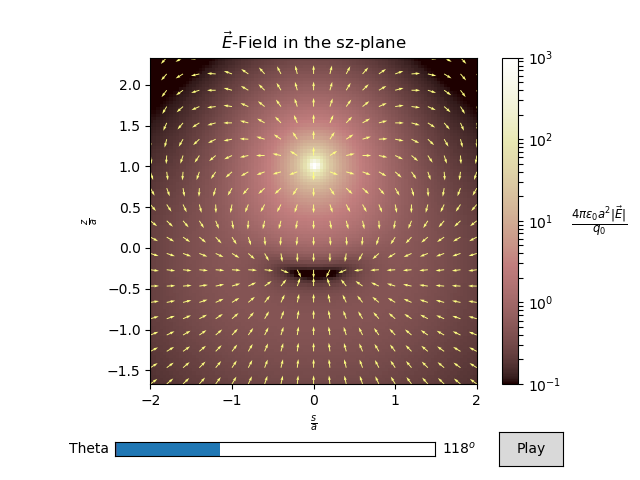

Wall time: 3.95 s


In [4]:
%%time
# The convenience function
timeline = amp.Timeline(angles, units='$^o$')
blocks = amp.blocks.vector_comp(s[:,:,0], z[:,:,0], Es, Ez, t_axis=2, pcolor_kw=pargs, quiver_kw=qargs)
anim = amp.Animation(blocks, timeline)

# standard matplotlib things
cbar = plt.colorbar(blocks[0].quad)
cbar.set_label(r'$\frac{4\pi\epsilon_0 a^2 |\vec{E}|}{q_0}$', rotation=0, size='large')
cbar.ax.yaxis.set_label_coords(6,.55)

plt.gca().set_aspect('equal')
plt.title(r'$\vec{E}$-Field in the sz-plane')
plt.xlabel(r'$\frac{s}{a}$')
plt.ylabel(r'$\frac{z}{a}$')

# create the controls and show the animation
anim.timeline_slider(text='Theta', valfmt='%1.0f')
anim.toggle()
anim.save('efield.gif', writer='pillow', fps=10, dpi=200) #save animation for the docs
plt.show()